In [1]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

# Ejercicio 1

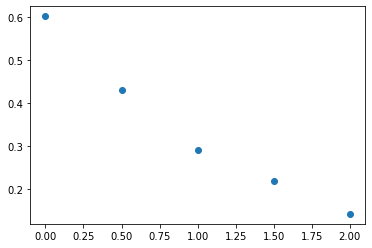

In [2]:
x = np.array([0, 0.5, 1, 1.5, 2])
y = np.array([0.601, 0.429, 0.290, 0.219, 0.142])
plt.plot(x, y,'o')
plt.show()

## Lineal

Regresión lineal: y = -0.226x + 0.562


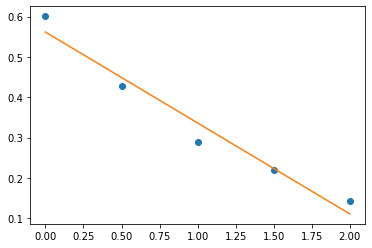

Coeficiente de determinación: 0.9616339215265411


In [3]:
x = np.array([0, 0.5, 1, 1.5, 2])
y = np.array([0.601, 0.429, 0.290, 0.219, 0.142])
sum_xi = np.sum(x)
sum_xi_2 = np.sum(x**2)
sum_yi = np.sum(y)
sum_xiyi = np.sum(x*y)
a = np.array([[sum_xi_2, sum_xi],
              [sum_xi, len(x)]])
b = np.array([sum_xiyi ,sum_yi])
solve_lineal = np.linalg.solve(a, b)

print(f'Regresión lineal: y = {solve_lineal[0]:.3f}x + {solve_lineal[1]:.3f}')
f_lin = lambda x: solve_lineal[0]*x + solve_lineal[1]

xi = np.linspace(np.min(x),np.max(x),1001)
plt.plot(x, y,'o')
plt.plot(xi, f_lin(xi),'-')
plt.show()

y_media = y.mean()
y_predict = f_lin(x)
s_t = ((y - y_media)**2).sum()
s_r = ((y - y_predict)**2).sum()
r_2_lin = (s_t - s_r) / s_t
print(f'Coeficiente de determinación: {r_2_lin}')

## Cuadrática

Regresión cuadrática: y = 0.074x^2 + -0.373x + 0.599


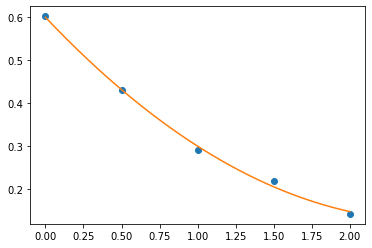

Coeficiente de determinación: 0.9975677054159583


In [4]:
x = np.array([0, 0.5, 1, 1.5, 2])
y = np.array([0.601, 0.429, 0.290, 0.219, 0.142])

sum_xi = np.sum(x)
sum_xi_2 = np.sum(x**2)
sum_xi_3 = np.sum(x**3)
sum_xi_4 = np.sum(x**4)
sum_yi = np.sum(y)
sum_xiyi = np.sum(x*y)
sum_xi_2yi = np.sum(x**2*y)
a = np.array([[sum_xi_4, sum_xi_3, sum_xi_2],
              [sum_xi_3, sum_xi_2, sum_xi],
              [sum_xi_2, sum_xi, len(x)]])
b = np.array([sum_xi_2yi, sum_xiyi ,sum_yi])
solve_cuad = np.linalg.solve(a, b)
f_cuad = lambda x: solve_cuad[0]*x**2 + solve_cuad[1]*x + solve_cuad[2]
print(f'Regresión cuadrática: y = {solve_cuad[0]:.3f}x^2 + {solve_cuad[1]:.3f}x + {solve_cuad[2]:.3f}')

xi = np.linspace(np.min(x),np.max(x),1001)
plt.plot(x, y,'o')
plt.plot(xi, f_cuad(xi),'-')
plt.show()

y_media = y.mean()
y_predict = f_cuad(x)
s_t = ((y - y_media)**2).sum()
s_r = ((y - y_predict)**2).sum()
r_2_cuad = (s_t - s_r) / s_t
print(f'Coeficiente de determinación: {r_2_cuad}')

## Exponencial

Regresión exponencial: Y = 0.606*e^(-0.712*x)


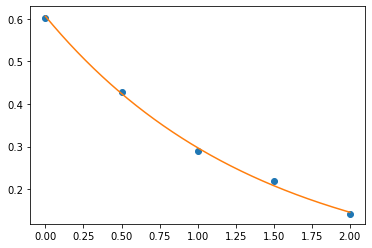

Coeficiente de determinación: 0.9982804968191593


In [19]:
x = np.array([0, 0.5, 1, 1.5, 2])
y = np.array([0.601, 0.429, 0.290, 0.219, 0.142])
Y = np.log(y)

sum_xi = np.sum(x)
sum_xi_2 = np.sum(x**2)
sum_Yi = np.sum(Y)
sum_xiYi = np.sum(x*Y)
a = np.array([[sum_xi_2, sum_xi],
              [sum_xi, len(x)]])
b = np.array([sum_xiYi ,sum_Yi])
solve_3 = np.linalg.solve(a, b)
f_exp = lambda x: np.exp(solve_3[1]) * np.exp(solve_3[0]*x)
a_0, a_1  = np.exp(solve_3[1]), solve_3[0]
print(f'Regresión exponencial: Y = {a_0:.3f}*e^({a_1:.3f}*x)')

xi = np.linspace(np.min(x),np.max(x),1001)
plt.plot(x, y,'o')
plt.plot(xi, f_exp(xi),'-')
plt.show()

y_media = y.mean()
y_predict = f_exp(x)
s_t = ((y - y_media)**2).sum()
s_r = ((y - y_predict)**2).sum()
r_2_exp = (s_t - s_r) / s_t
print(f'Coeficiente de determinación: {r_2_exp}')

In [20]:
print(f'Coeficiente de determinación\n'
      f'- lineal: {r_2_lin:.5f}\n'
      f'- cuadratico: {r_2_cuad:.5f}\n'
      f'- exponenncial: {r_2_exp:.5f}')

Coeficiente de determinación
- lineal: 0.96163
- cuadratico: 0.99757
- exponenncial: 0.99828


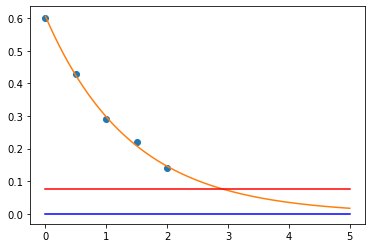

In [21]:
const = 0.075 * np.ones(1001)
zero = 0* np.ones(1001)
xi = np.linspace(np.min(x),5,1001)
xi_2 = np.linspace(np.min(x),2.6,1001)
plt.plot(x, y,'o')
#plt.plot(xi_2, f_lin(xi_2),'-')
#plt.plot(xi, f_cuad(xi),'-')
plt.plot(xi, f_exp(xi),'-')
plt.plot(xi, const,'r-')
plt.plot(xi, zero,'b-')
plt.show()

In [8]:
def met_biseccion(f, a, b, tol=1e-4, n=50, verbose=True, print_error=False,
                  deploy_error=False):
    if not f(a) * f(b) < 0:
        print(f'El intervalo no funciona: f({a})={f(a):.2f}, f({b})={f(b):.2f}')
        return None
    i = 1
    lista_errores = [abs(b - a)]
    p_0 = a
    while i <= n:
        p_i = (b + a) / 2  # punto medio
        e_abs = abs(p_0 - p_i)
        if verbose:
            print(f'ite {i:<2}: a_{i - 1:<2} = {a:.4f}, b_{i - 1:<2} = {b:.4f}, p_{i:<2} = {p_i:.5f}'
                  f' | e_abs: {e_abs:e}')

        if f(p_i) == 0:
            if print_error:
                print(f'error x iteración: {lista_errores}')
            print(f'>>> Solución exacta encontrada después de {i} iteraciones: x->{p_i:.15f}')
            if deploy_error:
                return lista_errores, p_i
            else:
                return p_i

        if f(a) * f(p_i) < 0:
            b = p_i
        else:
            a = p_i
        p_0 = p_i
        lista_errores.append(e_abs)
        if e_abs < tol:
            if print_error:
                print(f'error x iteración: {lista_errores}')
            print(f'>>> Solución encontrada después de {i} iteraciones: x->{p_i:.15f}')
            if deploy_error:
                return lista_errores, p_i
            else:
                return p_i
        i += 1

    if print_error:
        print(f'error x iteración: {lista_errores}')
    print('solución no encontrada, iteraciones agotadas')
    return None

In [9]:
f_sol = lambda x: f_exp(x) - 0.075
met_biseccion(f_sol, 2, 4, verbose=False)

>>> Solución encontrada después de 15 iteraciones: x->2.935729980468750


2.93572998046875

# Ejercicio 2

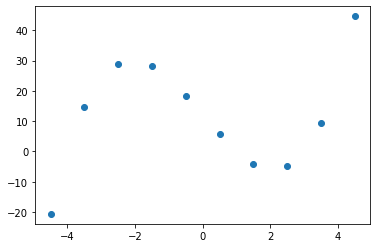

In [10]:
data = np.array([(-4.5, -20.625), (-3.5, 14.625), (-2.5, 28.875), (-1.5, 28.125), (-0.5, 18.375), (0.5, 5.625), (1.5, -4.125), (2.5, -4.875), (3.5, 9.375), (4.5, 44.625)])
x = data[:,0]
y = data[:,1]
plt.plot(x, y,'o')
plt.show()

In [11]:
# Interpolacion de Lagrange
# INGRESO , Datos de prueba
xi = data[:,0]
fi = data[:,1]

# PROCEDIMIENTO
n = len(xi)
x = sym.Symbol('x')
polinomio = 0
divisorL = np.zeros(n, dtype = float)
for i in range(0,n,1):
    # Termino de Lagrange
    numerador = 1
    denominador = 1
    for j  in range(0,n,1):
        if (j!=i):
            numerador = numerador*(x-xi[j])
            denominador = denominador*(xi[i]-xi[j])
    terminoLi = numerador/denominador

    polinomio = polinomio + terminoLi*fi[i]
    divisorL[i] = denominador

# simplifica el polinomio
polisimple = polinomio.expand()

# para evaluación numérica
px = sym.lambdify(x,polisimple)

# Puntos para la gráfica
muestras = 1001
a = np.min(xi)
b = np.max(xi)
pxi = np.linspace(a-0.1,b+0.1,muestras)
pfi = px(pxi)

# SALIDA
print('Polinomio de Lagrange: ')
print(polisimple)

Polinomio de Lagrange: 
1.30104260698261e-18*x**9 + 8.67361737988404e-19*x**8 - 5.55111512312578e-17*x**7 + 5.55111512312578e-17*x**6 + 3.33066907387547e-16*x**5 - 4.44089209850063e-16*x**4 + 0.999999999999997*x**3 - 13.0*x + 12.0


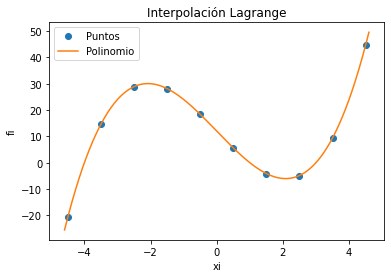

In [12]:
# Gráfica
plt.plot(xi,fi,'o', label = 'Puntos')
plt.plot(pxi,pfi, label = 'Polinomio')
plt.legend()
plt.xlabel('xi')
plt.ylabel('fi')
plt.title('Interpolación Lagrange')
plt.show()

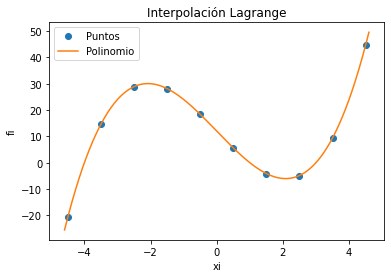

In [13]:
interpolador = lambda x: 0.999999999999997*x**3 - 13.0*x + 12.0
plt.plot(xi,fi,'o', label = 'Puntos')
plt.plot(pxi,interpolador(pxi), label = 'Polinomio')
plt.legend()
plt.xlabel('xi')
plt.ylabel('fi')
plt.title('Interpolación Lagrange')
plt.show()

In [14]:
print(f'x = -4 - y = {px(-4):.5f},    x = 1 - y = {px(1):.5f},     x = 3 - y = {px(3):.5f}')
print(f'x = -4 - y = {interpolador(-4):.5f},    x = 1 - y = {interpolador(1):.5f},     x = 3 - y = {interpolador(3):.5f}')

x = -4 - y = 0.00000,    x = 1 - y = -0.00000,     x = 3 - y = -0.00000
x = -4 - y = 0.00000,    x = 1 - y = -0.00000,     x = 3 - y = -0.00000


In [15]:
x = data[:,0]
y = data[:,1]
sum_xi = np.sum(x)
sum_xi_2 = np.sum(x**2)
sum_xi_3 = np.sum(x**3)
sum_xi_4 = np.sum(x**4)
sum_xi_5 = np.sum(x**5)
sum_xi_6 = np.sum(x**6)
sum_yi = np.sum(y)
sum_xiyi = np.sum(x*y)
sum_xi_2yi = np.sum(x**2*y)
sum_xi_3yi = np.sum(x**3*y)
a = np.array([[sum_xi_6, sum_xi_5, sum_xi_4, sum_xi_3],
              [sum_xi_5, sum_xi_4, sum_xi_3, sum_xi_2],
              [sum_xi_4, sum_xi_3, sum_xi_2, sum_xi],
              [sum_xi_3, sum_xi_2, sum_xi, len(x)]])
b = np.array([sum_xi_3yi, sum_xi_2yi, sum_xiyi ,sum_yi])
solve_cubic = np.linalg.solve(a, b)

print(f'Regresión cúbica: y = {solve_cubic[0]:.3f}x^3 + {solve_cubic[1]:.3f}x^2 + {solve_cubic[2]:.3f}x + {solve_cubic[3]:.3f}')
f_cubic = lambda x: solve_cubic[0]*x**3 + solve_cubic[1]*x**2 + solve_cubic[2]*x + solve_cubic[3]


Regresión cúbica: y = 1.000x^3 + 0.000x^2 + -13.000x + 12.000


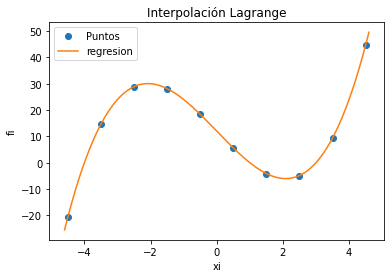

In [16]:
interpolador = lambda x: 0.999999999999997*x**3 - 13.0*x + 12.0
plt.plot(xi,fi,'o', label = 'Puntos')
# plt.plot(pxi,interpolador(pxi), label = 'Polinomio')
plt.plot(pxi,f_cubic(pxi), label = 'regresion')
plt.legend()
plt.xlabel('xi')
plt.ylabel('fi')
plt.title('Interpolación Lagrange')
plt.show()

In [17]:
print(f'x = -4 - y = {f_cubic(-4):.5f},    x = 1 - y = {f_cubic(1):.5f},     x = 3 - y = {f_cubic(3):.5f}')

x = -4 - y = 0.00000,    x = 1 - y = -0.00000,     x = 3 - y = -0.00000
